# Decision Tree Classification-We want to predict  salary of employee would be more than 50000 or not

# Import  Reqrired Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import seaborn as sns # statistical data visualization


from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split#Train Test Split
from sklearn.metrics import confusion_matrix,classification_report


# Import Dataset

In [2]:
data=pd.read_csv("Decision_Tree_CSV_to.csv")

In [3]:
data

,company,job,degree,salary_more_then_50000
0,Reliance,sales executive,bachelors,0
1,Reliance,sales executive,masters,0
2,Reliance,business manager,bachelors,1
3,Reliance,business manager,masters,1
4,Reliance,computer programmer,bachelors,0
5,Reliance,computer programmer,masters,1
6,Torrent,sales executive,masters,0
7,Torrent,computer programmer,bachelors,0
8,Torrent,business manager,bachelors,0
9,Torrent,business manager,masters,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   company                 16 non-null     object
 1   job                     16 non-null     object
 2   degree                  16 non-null     object
 3   salary_more_then_50000  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [5]:
data.isnull().sum()

company                   0
job                       0
degree                    0
salary_more_then_50000    0
dtype: int64

In [6]:
y = data['salary_more_then_50000']

In [7]:
x = data.drop('salary_more_then_50000',axis='columns')

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
x=x.apply(LabelEncoder().fit_transform)

In [10]:
x

,company,job,degree
0,0,2,0
1,0,2,1
2,0,0,0
3,0,0,1
4,0,1,0
5,0,1,1
6,2,2,1
7,2,1,0
8,2,0,0
9,2,0,1


# Train Test Split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [12]:
X_train

,company,job,degree
11,1,2,1
8,2,0,0
9,2,0,1
2,0,0,0
15,1,1,1
4,0,1,0
7,2,1,0
10,1,2,0
12,1,0,0
3,0,0,1


In [13]:
X_train.shape

(11, 3)

In [14]:
X_test

,company,job,degree
0,0,2,0
1,0,2,1
5,0,1,1
14,1,1,0
13,1,0,1


In [15]:
Y_train.shape

(11,)

In [16]:
Y_train

11    1
8     0
9     1
2     1
15    1
4     0
7     0
10    1
12    1
3     1
6     0
Name: salary_more_then_50000, dtype: int64

In [17]:
Y_test

0     0
1     0
5     1
14    1
13    1
Name: salary_more_then_50000, dtype: int64

# Model Initilization

In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [19]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [20]:
model.score(X_train,Y_train)

1.0

In [21]:
model.score(X_test,Y_test)

0.8

In [22]:
y_pred  = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1], dtype=int64)

In [23]:
confusion_matrix(Y_test, y_pred)

array([[2, 0],
       [1, 2]], dtype=int64)

In [24]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 1.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 1
|--- feature_0 >  1.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 0



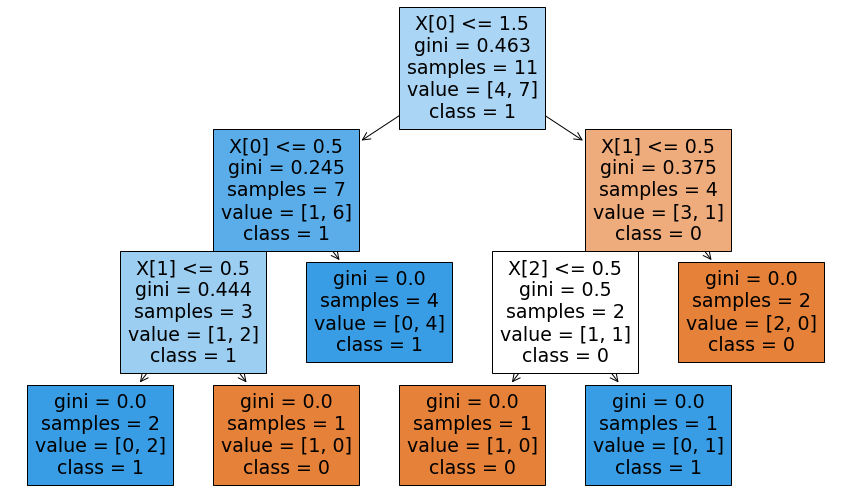

In [25]:
plt.figure(figsize=(15,9))

from sklearn import tree

tree.plot_tree(model,
                   class_names=['0','1'],
                   filled=True); 

# Prediction

In [26]:
# 0-No Salary is not greater than 50000

In [27]:
model.predict([[0,2,0]])

array([0], dtype=int64)

In [28]:
# actual values
y_pred

array([0, 0, 0, 1, 1], dtype=int64)

In [29]:
Y_test

0     0
1     0
5     1
14    1
13    1
Name: salary_more_then_50000, dtype: int64

# Confusion Matrix

In [30]:
from sklearn import metrics 

In [31]:
# confusion matrix,accuracy,classification_report in sklearn
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [32]:
# confusion matrix
matrix = confusion_matrix(Y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[2 1]
 [0 2]]


# Accuracy

In [33]:
accuracy = metrics.accuracy_score(Y_test,y_pred)

In [34]:
accuracy

0.8

In [35]:
accuracy_percentage = 100 * accuracy
accuracy_percentage

80.0

# Classification Report

In [36]:
report=classification_report(Y_test,y_pred) 

In [37]:
print(report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

